# New York State Rₜ
> Daily updates on NYS Rₜ.

- badges: true
- comments: true
- categories: [jupyter]
- permalink: /daily/

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastpapers

In [2]:
#hide
from babino2020masks.core import *
from babino2020masks.lasso import *

Matplotlib is building the font cache; this may take a moment.


In [3]:
#hide
ny = API(api_settings['NYS'][:2], **api_settings['NYS'][2])
df = ny.get_all_data_statewide()

/opt/hostedtoolcache/Python/3.8.15/x64/lib/python3.8/site-packages/babino2020masks/core.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for o in self.iter_data(): df = df.append(o)
/opt/hostedtoolcache/Python/3.8.15/x64/lib/python3.8/site-packages/babino2020masks/core.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for o in self.iter_data(): df = df.append(o)
/opt/hostedtoolcache/Python/3.8.15/x64/lib/python3.8/site-packages/babino2020masks/core.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for o in self.iter_data(): df = df.append(o)
/opt/hostedtoolcache/Python/3.8.15/x64/lib/python3.8/site-packages/babino2020masks/core.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pa

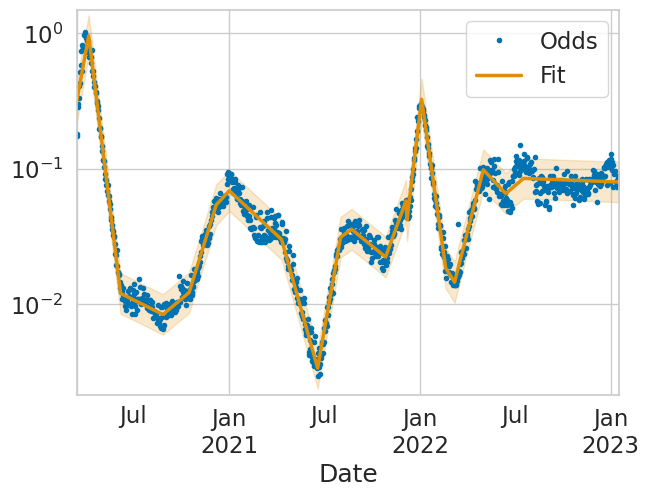

In [4]:
#hide_input
lics = LassoICSelector(df['Odds'], 'bic')
lics.fit_best_alpha()
df['Fit'], df['Odds_l'], df['Odds_u'] = lics.odds_hat_l_u()
ax = plot_data_and_fit(df, 'Date', 'Odds', 'Fit', 'Odds_l', 'Odds_u', figsize=(7, 5))

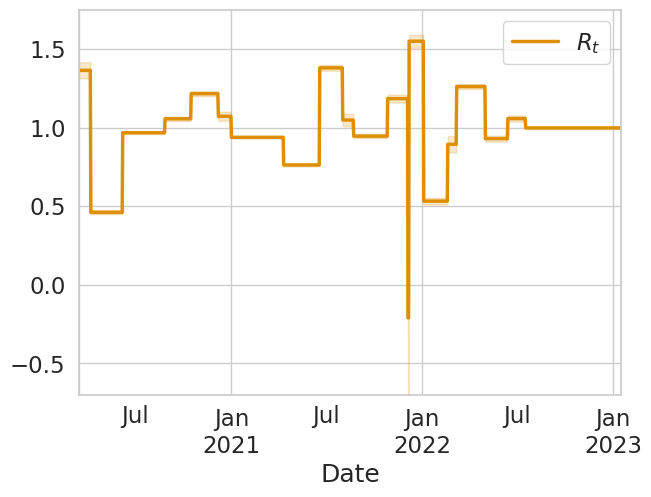

In [5]:
#hide_input
df['$R_t$'], df['Rl'], df['Ru'] = lics.rt()
ax = plot_data_and_fit(df, 'Date', None, '$R_t$', 'Rl', 'Ru', figsize=(7, 5), logy=False, palette=[colorblind[1],colorblind[1]])

In [6]:
#hide_input
print(f'Rₜ on {df.Date.iloc[-1]:%B %d %Y}: {df["$R_t$"].iloc[-1]:2.3} ({df["Rl"].iloc[-1]:2.3}-{df["Ru"].iloc[-1]:2.3} 95% C.I)')

Rₜ on January 17 2023: 0.997 (0.994-1.0 95% C.I)


In [7]:
#hide_input
from datetime import datetime
print(f'Last updated on {datetime.today():%m/%d/%Y %H:%M:%S}')

Last updated on 01/18/2023 21:38:53


* [Source code](https://github.com/ababino/babino2020masks)
* [Preprint](https://arxiv.org/abs/2006.05532)